# AST4930 Homework Assignment #6 (20 pts + 5 pts)

### Instruction:

In this homework, we will use DBSCAN to cluster stars in the Orion complex, inspired by this work: Chen et al. (2020), https://ui.adsabs.harvard.edu/abs/2020A%26A...643A.114C/abstract In that paper, the authors used Shared Nearest Neighbor (SNN), which we did not cover during this course. We will use DBSCAN instead and compare the results. We will use the same Gaia data set which the authors made publicly available on this Github repository: https://github.com/BoquanErwinChen/GaiaDR2_Orion_Dissection I put the data file in the HiPerGator class share folder.

Below you will find instruction to this homework assignment.

1. I learned that when I download your .ipynb file from Canvas, it automatically adds your name to the file name. So you don't have to put your last name manually.

2. As you will see, the Notebook is partially filled. Fill in the empty cells. 

3. Note that there are questions you will have to answer. They will start with "Q: ..." The answers will be graded so make sure you answer all the questions.

4. It's fine you work on somewhere else than HiPerGator. But when I grade your homework, I will run your Jupyter Notebook on HiPerGator. So before you submit your homework, make sure you test it on HiPerGator and see if you get any error messages. For this particular homework assignment, we are concerned about the computing time so I'd like you all to use the HiPerGator resources for a fair comparison. 

5. It's fine if you use someone else's code you found on Internet, but make sure you write down the source. You don't have to cite me when you use anything from AST4930 Notebook. But as we learned from Homework Assignment #2, I do make mistakes. So please double-check before you copy and paste my script!

6. It's a common sense but just to make sure... when you make a figure, make sure they are readable/understandable. If you cannot see the title, labels, data points, or if you don't understand the point of the figure, I won't probably be able to see/understand them either!

6. Submit your final .ipynb file via Canvas before the due date.

### Let's read in the Gaia data.

In [1]:
import pandas as pd

filename = "/blue/ast4930/share/Orion_data_20190924.csv"
df = pd.read_csv(filename)
df.dropna(subset=['ra', 'dec', 'parallax', 'pmra', 'pmdec'])
df = df.reset_index(drop=True)

In [2]:
df

,ra,ra_error,dec,dec_error,source_id,parallax,parallax_error,pmra,pmra_error,pmdec,...,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val,ruwe
0,75.254413,0.191960,-3.397018,0.139120,3213149215497176960,2.794918,0.212409,-2.617536,0.408962,1.669195,...,17.211597,2.672356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.909273
1,75.561670,0.234429,-4.866204,0.206860,3212376190103379584,3.165823,0.280067,-2.495638,0.511235,0.305570,...,17.622894,2.886185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.033360
2,75.052364,0.067621,-3.386506,0.052373,3213160421067816320,2.819880,0.073171,3.840388,0.135597,0.344070,...,15.534090,2.050842,NaN,NaN,3860.6667,0.2240,0.1140,NaN,NaN,1.001610
3,75.021177,0.103251,-4.005701,0.078453,3212679487809861248,2.669342,0.123817,0.160382,0.229156,-0.794245,...,15.949252,3.309411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957134
4,75.179643,0.030784,-6.085392,0.026767,3211380620978873344,3.635541,0.038434,-1.479837,0.063476,-1.582998,...,9.450638,0.358518,NaN,NaN,8049.0000,0.5495,0.3030,NaN,NaN,1.243121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29025,89.445830,0.194402,6.615502,0.185320,3321921839250935424,2.963123,0.234839,3.694528,0.367675,-2.861006,...,16.974401,2.873224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022000
29026,89.129035,0.025935,6.574493,0.026383,3322578251987928576,2.348265,0.031663,-2.595891,0.048980,-1.927499,...,13.123673,1.322178,NaN,NaN,4863.4053,0.8170,0.4082,0.937234,0.442744,1.047600
29027,89.368736,0.152991,6.784836,0.146842,3322675691910202368,4.136481,0.186160,-3.831424,0.303003,-2.835496,...,16.644974,2.890482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997614
29028,89.196556,0.030407,6.698468,0.028375,3322676074163325952,2.695094,0.032618,-3.342518,0.061107,-3.943541,...,14.011317,1.566079,NaN,NaN,4465.4100,0.6405,0.3232,0.659014,0.155571,1.015678


### Spatial distribution on the sky

Text(0, 0.5, 'Dec (deg)')

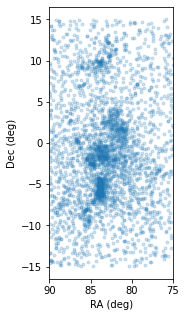

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(df.ra[::10], df.dec[::10], '.', alpha=0.2)
ax.set_xlim(90,75)
ax.set_aspect('equal')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')


### Proper motions

Text(0, 0.5, 'PMDec (mas/yr)')

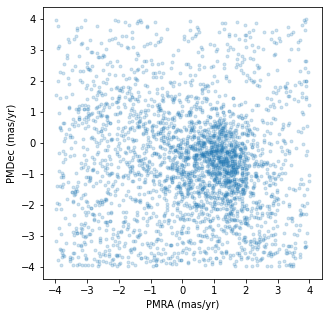

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(df.pmra[::10], df.pmdec[::10], '.', alpha=0.2)
ax.set_xlabel('PMRA (mas/yr)')
ax.set_ylabel('PMDec (mas/yr)')


### CMD

Text(0, 0.5, 'g (mag)')

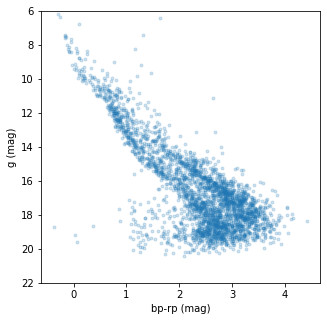

In [5]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot((df.phot_bp_mean_mag - df.phot_rp_mean_mag)[::10], df.phot_g_mean_mag[::10], '.', alpha=0.2)
ax.set_ylim(22,6)
ax.set_xlabel('bp-rp (mag)')
ax.set_ylabel('g (mag)')

### We will use RA, Dec, parallal, proper motions (RA & Dec)

In [6]:
X = df[['ra','dec','parallax','pmra','pmdec']]

In [7]:
X

,ra,dec,parallax,pmra,pmdec
0,75.254413,-3.397018,2.794918,-2.617536,1.669195
1,75.561670,-4.866204,3.165823,-2.495638,0.305570
2,75.052364,-3.386506,2.819880,3.840388,0.344070
3,75.021177,-4.005701,2.669342,0.160382,-0.794245
4,75.179643,-6.085392,3.635541,-1.479837,-1.582998
...,...,...,...,...,...
29025,89.445830,6.615502,2.963123,3.694528,-2.861006
29026,89.129035,6.574493,2.348265,-2.595891,-1.927499
29027,89.368736,6.784836,4.136481,-3.831424,-2.835496
29028,89.196556,6.698468,2.695094,-3.342518,-3.943541


### Q: Does DBSCAN need feature scaling? Why?

Typically yes, you do need feature scaling for DBSCAN because it is a distance based algorithm


### TODO: If you think we need feature scaling, standardize the data. Otherwise, move on to the next step.

In [8]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

### TODO: hyperparameter optimization.

For DBSCAN, there are two hyperparameters to optimize: epsilon & min_samples. We should explore a grid of models to optimize the hyperparameters, but for the sake of computing time let's fix min_samples = 10 and try to find a "good" epsilon value. To do so, let's adopt what has been done in Castro-Ginard et al. (2018; https://ui.adsabs.harvard.edu/abs/2018A%26A...618A..59C/abstract). See also week 12 lecture note.

To briefly summarize, we generate a random sample having the same number of stars to our dataset, where the features are drawn "randomly". The idea is that, if the stars are all "field stars", not cluster stars, then the distribution would be following Gaussian distribution.

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

In [10]:
## fix min samples to 10
model = DBSCAN(min_samples=10)
model.fit(X)

DBSCAN(min_samples=10)

In [11]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, alpha=0.1)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

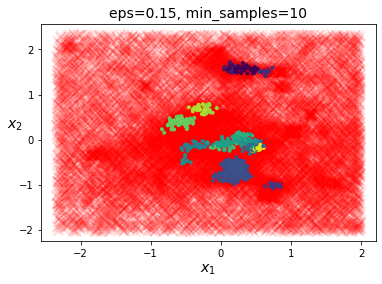

In [12]:
model1 = DBSCAN(eps=0.15, min_samples=10)
model1.fit(X)

plot_dbscan(model1, X, size=100)

In [13]:
labels1 = model1.fit_predict(X)
print("Unique labels: {}".format(np.unique(labels1)))

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25]


27 lables 

### Here's where I generate the new random sample.

In [14]:
import numpy as np

X_new = np.zeros_like(X)

# I draw 29,030 RA values using the mean and standard deviation of the dataset. 
X_new[:,0] = np.random.normal(df.ra.mean(), df.ra.std(), X.shape[0]) ##X.shape - number of points we want to draw
# Same for Dec, parallax, PMRA, PMDec.
X_new[:,1] = np.random.normal(df.dec.mean(), df.dec.std(), X.shape[0])
X_new[:,2] = np.random.normal(df.parallax.mean(), df.parallax.std(), X.shape[0])
X_new[:,3] = np.random.normal(df.pmra.mean(), df.pmra.std(), X.shape[0])
X_new[:,4] = np.random.normal(df.pmdec.mean(), df.pmdec.std(), X.shape[0])

### TODO: If you think we need feature scaling for this new data set, standardize the data. Otherwise, move on to the next step.

In [15]:
X_new = StandardScaler().fit_transform(X_new)

### TODO: For the original data set, compute the distance to the 10th nearest neighbor.

Hint: Refer to week 10 notebook.

In [16]:
nn = NearestNeighbors(n_neighbors=10)
neighbors = nn.fit(X)
distances, indices = neighbors.kneighbors(X)

In [17]:
distances

array([[0.        , 0.61074078, 0.68617969, ..., 0.90257126, 0.91799813,
        0.93278636],
       [0.        , 0.39897442, 0.45183021, ..., 0.71556692, 0.76280059,
        0.77628544],
       [0.        , 0.40039288, 0.41651147, ..., 0.83782244, 0.89987934,
        0.92810142],
       ...,
       [0.        , 0.19486166, 0.53790967, ..., 0.8093855 , 0.83941947,
        0.98384659],
       [0.        , 0.2576327 , 0.26602386, ..., 0.42851675, 0.4292744 ,
        0.45584569],
       [0.        , 0.28837649, 0.55478883, ..., 0.63515182, 0.64058321,
        0.65240709]])

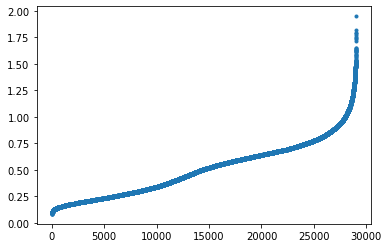

In [18]:
distances = distances[:,-1]
distances = np.sort(distances, axis=0)
plt.plot(distances, '.')

### TODO: For the random data set, compute the distance to the 10th nearest neighbor.

Hint: Refer to week 10 notebook.

In [19]:
nn_new = NearestNeighbors(n_neighbors=10)
neighbors_new = nn_new.fit(X_new)
distances_new, indices = neighbors_new.kneighbors(X_new)

In [20]:
distances_new

array([[0.        , 0.1519435 , 0.21617526, ..., 0.40999065, 0.43697056,
        0.44235072],
       [0.        , 0.25782022, 0.30868554, ..., 0.40754723, 0.42352844,
        0.44087241],
       [0.        , 0.29848593, 0.41362447, ..., 0.52340051, 0.52365781,
        0.52559126],
       ...,
       [0.        , 0.46414168, 0.54024277, ..., 0.60449217, 0.60925894,
        0.62545865],
       [0.        , 0.25072047, 0.36272047, ..., 0.64658019, 0.64876569,
        0.6871936 ],
       [0.        , 0.3831783 , 0.55128767, ..., 0.67667496, 0.68404037,
        0.68861877]])

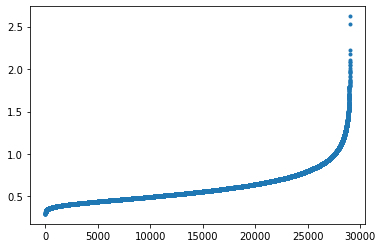

In [21]:
distances_new = distances_new[:,-1]
distances_new = np.sort(distances_new, axis=0)
plt.plot(distances_new, '.')

### TODO: Make a histogram showing the 10th nearest neighbor distance for the original data set and for the random data set. The idea is to make a similar plot to Figure 3 of Castro-Ginard et al. (2018).

You can use the script below. You should see something similar to what I have.

Text(0.5, 0, '10th nearest neighbor distance')

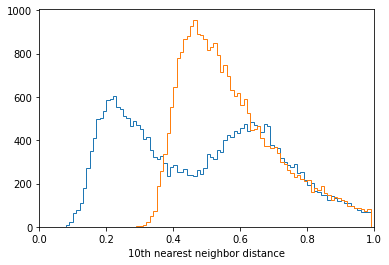

In [22]:
plt.hist(distances, bins=np.arange(0,1,0.01), histtype='step')
plt.hist(distances_new, bins=np.arange(0,1,0.01), histtype='step')

plt.xlim(0,1)
plt.xlabel('10th nearest neighbor distance')

Blue is actual distribution, orange is randomly drawn sample

### Q: What do you think is the reasonable epsilon value based on the above histogram and why?

The orange sample has a minimum  of 0.1 epsilon and he blue graph has a minumum of around 0.45. (0.1 + 0.45) /2 = 0.275

### Let's be conservative and choose eplison=0.15

### TODO: Make a DBSCAN model using epsilon=0.15 & min_samples=10.

I got confused if you meant for X_new or X so I did both

In [23]:
model2 = DBSCAN(eps=0.15, min_samples=10)
model2.fit(X_new)

DBSCAN(eps=0.15, min_samples=10)

In [24]:
labels2 = model2.fit_predict(X_new)
print("Unique labels: {}".format(np.unique(labels2)))

Unique labels: [-1]


In [25]:
np.bincount(labels2+1)

array([29030])

In [26]:
#for eps in np.arange(0.1,2, 0.1):
#    print("\neps={}".format(eps))
#    dbscan = DBSCAN(eps=eps)
#    labels = dbscan.fit_predict(X_new)
#    print("Number of clusters: {}".format(len(np.unique(labels))))
#    print("Cluster sizes: {}".format(np.bincount(labels + 1)))

In [27]:
#model = DBSCAN(eps=0.6)
#labels = model.fit_predict(X_new)
#print("Unique labels: {}".format(np.unique(labels)))

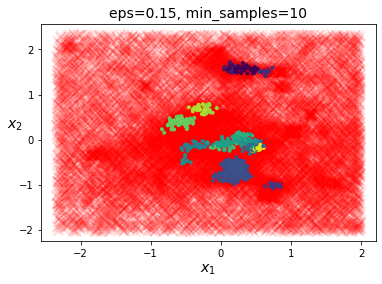

In [28]:
model1 = DBSCAN(eps=0.15, min_samples=10)
model1.fit(X)

plot_dbscan(model1, X, size=100)

### Q: How many clusters did you find?

In [30]:
## For X
labels1 = model1.fit_predict(X)
print("Unique labels For X: {}".format(np.unique(labels1)))

Unique labels For X: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25]


In [32]:
## For X_new
labels2 = model2.fit_predict(X_new)
print("Unique labels For X: {}".format(np.unique(labels2)))

Unique labels For X: [-1]


### Q: How many members do each clusters have?

In [34]:
np.bincount(labels1+1)

array([27333,    64,    32,    22,    15,    25,    13,   956,     7,
          11,    44,    27,    45,    10,    55,    95,     7,    30,
          10,    10,   132,    10,    19,    30,     9,    12,     7])

In [35]:
np.bincount(labels2+1)

array([29030])

For the new test dta there are 29030 elements. For the new test data I believe that epsilon of 0.15 is too low. Running a for loop to check overr epsilon, I find that at 0.3 the cluster number jumps up to 261 and after 0.8 the clustering goes to 2 clusters. 

### TODO: Make a figure showing the distribution of identified clusters. The idea is to make a plot similar to Figure 2 of Chen et al. (2020; https://ui.adsabs.harvard.edu/abs/2020A%26A...643A.114C/abstract). Feel free to use the script below as needed.

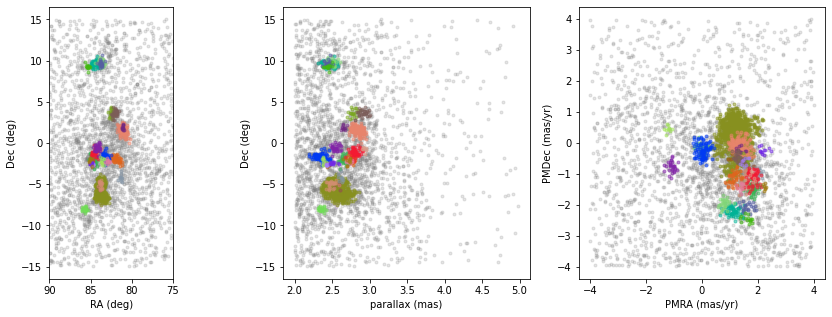

In [36]:
## For X
import random

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.plot(df.ra[::10], df.dec[::10], '.', color='gray', alpha=0.2)
ax1.set_xlim(90,75)
ax1.set_aspect('equal')
ax1.set_xlabel('RA (deg)')
ax1.set_ylabel('Dec (deg)')

ax2.plot(df.parallax[::10], df.dec[::10], '.', color='gray', alpha=0.2)
ax2.set_xlabel('parallax (mas)')
ax2.set_ylabel('Dec (deg)')


ax3.plot(df.pmra[::10], df.pmdec[::10], '.', color='gray', alpha=0.2)
ax3.set_xlabel('PMRA (mas/yr)')
ax3.set_ylabel('PMDec (mas/yr)')


n_colors = np.unique(model1.labels_).shape[0]-1

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(n_colors)]

for n in np.arange(np.unique(model1.labels_).shape[0]-1):
    ax1.plot(df.ra[model1.labels_ == n], df.dec[model1.labels_ == n], '.', alpha=0.5, c=color[n])
    ax2.plot(df.parallax[model1.labels_ == n], df.dec[model1.labels_ == n], '.', alpha=0.5, c=color[n])
    ax3.plot(df.pmra[model1.labels_ == n], df.pmdec[model1.labels_ == n], '.', alpha=0.5, c=color[n])

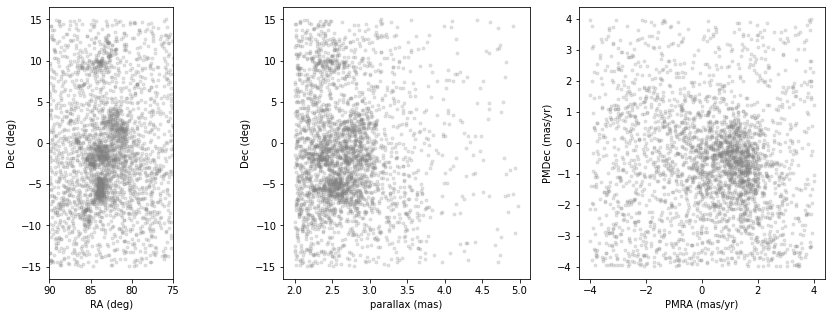

In [37]:
## for X_new
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.plot(df.ra[::10], df.dec[::10], '.', color='gray', alpha=0.2)
ax1.set_xlim(90,75)
ax1.set_aspect('equal')
ax1.set_xlabel('RA (deg)')
ax1.set_ylabel('Dec (deg)')

ax2.plot(df.parallax[::10], df.dec[::10], '.', color='gray', alpha=0.2)
ax2.set_xlabel('parallax (mas)')
ax2.set_ylabel('Dec (deg)')


ax3.plot(df.pmra[::10], df.pmdec[::10], '.', color='gray', alpha=0.2)
ax3.set_xlabel('PMRA (mas/yr)')
ax3.set_ylabel('PMDec (mas/yr)')


n_colors = np.unique(model2.labels_).shape[0]-1

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(n_colors)]

for n in np.arange(np.unique(model2.labels_).shape[0]-1):
    ax1.plot(df.ra[model2.labels_ == n], df.dec[model2.labels_ == n], '.', alpha=0.5, c=color[n])
    ax2.plot(df.parallax[model2.labels_ == n], df.dec[model2.labels_ == n], '.', alpha=0.5, c=color[n])
    ax3.plot(df.pmra[model2.labels_ == n], df.pmdec[model2.labels_ == n], '.', alpha=0.5, c=color[n])


^ the X_new plots are all grey because the epsilon value is too small

### Q: How do the clusters you identified compare with the ones identified in Chen et al. (2020)?

The clusters I found at epsilon =0.15 are similar to what was found for what was found in the Chen paper.

### Below is optional if you'd like to get some extra credits (max 5 points).

### TODO: Make two additional DBSCAN models adopting epsilon = 0.12, 0.2. Repeat the above procedure and identify clusters.

In [41]:
## epsilon 0.15
model1 = DBSCAN(eps=0.15, min_samples=10)
model1.fit(X)

labels1 = model1.fit_predict(X)
print("Number of Clusters: {}".format(np.unique(labels1)))
print("Cluster sizes: {}".format(np.bincount(labels1 + 1)))

Number of Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25]
Cluster sizes: [27333    64    32    22    15    25    13   956     7    11    44    27
    45    10    55    95     7    30    10    10   132    10    19    30
     9    12     7]


In [39]:
## epsilon 0.12
model_12 = DBSCAN(eps=0.12, min_samples=10)
model_12.fit(X)

labels_12 = model_12.fit_predict(X)
print("Number of Clusters: {}".format(np.unique(labels_12)))
print("Cluster sizes: {}".format(np.bincount(labels_12 + 1)))

Number of Clusters: [-1  0  1  2  3  4  5  6  7  8]
Cluster sizes: [28609    10   309    19    17     9    10    10    28     9]


In [40]:
## epsilon 0.2
model_2 = DBSCAN(eps=0.2, min_samples=10)
model_2.fit(X)

labels_2 = model_2.fit_predict(X)
print("Number of Clusters: {}".format(np.unique(labels_2)))
print("Cluster sizes: {}".format(np.bincount(labels_2 + 1)))

Number of Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27]
Cluster sizes: [23830    29   246    10   379    31     9    14    44    10    11     8
  3686    16    10    10   265     7    44    94   106    15    80     5
    10    11    17    15    18]


In [38]:
#for eps in np.arange(0.12,0.2, 0.01):
#    print("\neps={}".format(eps))
#    dbscan = DBSCAN(eps=eps)
#    labels = dbscan.fit_predict(X)
#    print("Number of clusters: {}".format(len(np.unique(labels))))
#    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=0.12
Number of clusters: 80
Cluster sizes: [27614    20    20    28     5     5     5    16     6    11     6     5
    15     5     6    10     5   503     5    92    27     5     5    35
     8    17    21     5    10     5     5     5     9    12     9     4
     9     4     5     8     8     6    13    16     8     6     5     7
     8     5    20     8    67     5     8     5    13     6     8    94
     9     5     4     5     5     5     7     6     3     5     9     9
    11     3     6     5     5     9     8     5]

eps=0.13
Number of clusters: 87
Cluster sizes: [27021     6    89     5     7     7     5    18     2     5    16    10
     7     7     5    12     8     8    17   952     5     7     3     4
     5     5    22     5    12     7    46     6     3     4     6    16
     5     5     4     3     5     7    48     5     4     4     5    10
     9     5     5     9    11     6     5     8     5     5    46    87
     4     4    31     5     8     5     5     5   

In [103]:
#for eps in np.arange(0.12,0.2, 0.01):
#    print("\neps={}".format(eps))
#    dbscan = DBSCAN(eps=eps)
#    labels = dbscan.fit_predict(X_new)
#    print("Number of clusters: {}".format(len(np.unique(labels))))
#    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=0.12
Number of clusters: 1
Cluster sizes: [29030]

eps=0.13
Number of clusters: 1
Cluster sizes: [29030]

eps=0.14
Number of clusters: 1
Cluster sizes: [29030]

eps=0.15000000000000002
Number of clusters: 1
Cluster sizes: [29030]

eps=0.16000000000000003
Number of clusters: 1
Cluster sizes: [29030]

eps=0.17000000000000004
Number of clusters: 1
Cluster sizes: [29030]

eps=0.18000000000000005
Number of clusters: 1
Cluster sizes: [29030]

eps=0.19000000000000006
Number of clusters: 1
Cluster sizes: [29030]

eps=0.20000000000000007
Number of clusters: 1
Cluster sizes: [29030]


### Q: How many clusters did you find with the new epsilon values, and how many stars are there in each clusters? How do these numbers compare with the model adopting epsilon=0.15?

For X: For epsilon 0.15 i got 27 groups, for 0.12 I got 10, and for 0.2 I got 29. The number of stars in each cluster can be seen in he arrays above. Epsilon 0.12 seems to underfit whereas epsilon 0.2 might be overfitting. This is a small range of epsilon but the number of clusters change significantly. 

For X_new: For these values of epsilon the number of clusters remains 1 with 29030 stars. These values of epsilon are still too small. 

### Q: What do you think of unsupervised learning? What are some of the issues?

I enjoy how visual unsupervised learning can be. When you know what it is you're looking for and what to plot, it is nice to be able to see the data. There are issues with figuring out what exactly you need in terms of hyperparameters and optimization. It can be hard to fine tune paramaters if you have high dimensional data. 